In [1]:
import Simulator.ChaoticSystem as CS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib widget

# Test ChaoticSystem

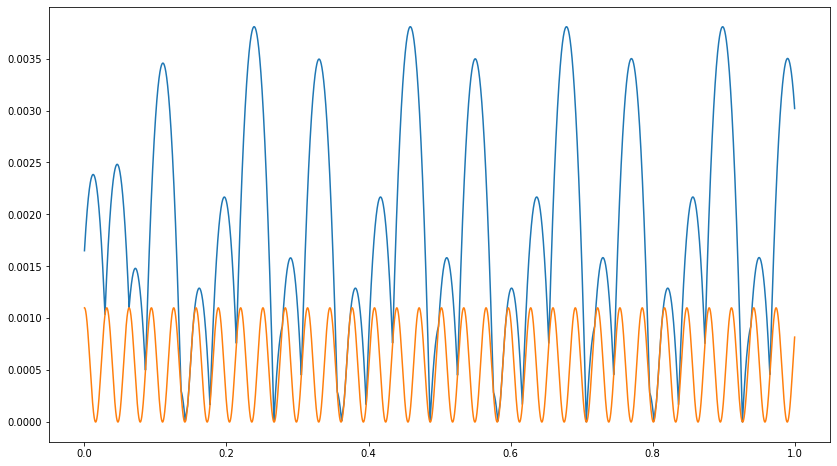

In [2]:
x0=0.0012
v0=0.12
A=0.41e-3
w=200

#b=ball(x0,2)
#p=platform(A=A,w=10)
c=CS.chaotic_system(x0,v0,A,w,0.53)
dt=0.0001
ndt=10_000


t_arr=[]
A_arr=[]

for A in np.linspace(300,550,250):
    A=A*1e-6
    #print('--------------',A)
    c.reset_platform(A)
    c.reset_ball(3*A,v0)
    c.reset()
    

    xcb = [c.get_ball_x()]
    xcp = [c.get_platform_x()]

    t = [0]
    for i in range(ndt):
        c.evolve(dt)
        t.append(t[i]+dt)
        xcb.append(c.get_ball_x())
        xcp.append(c.get_platform_x())
    
    A_arr.append([A for j in range(len( c.get_t_collisions()))])
    t_arr.append(c.get_t_collisions())
    
fig = plt.figure(figsize=(14,8))
plt.plot(t,xcb)
plt.plot(t,xcp)

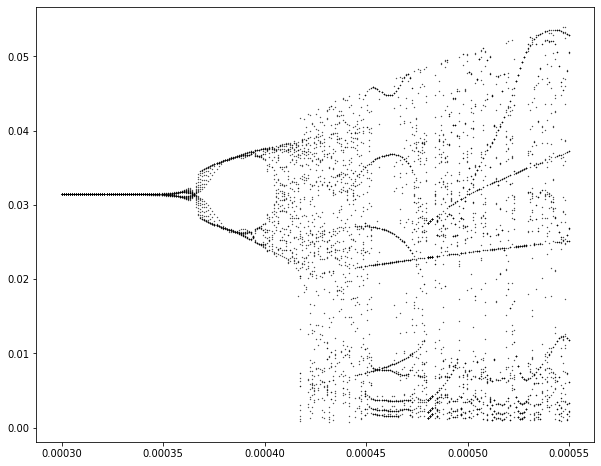

In [3]:
n_start=10
fig=plt.figure(figsize=(10,8))
for i in range(len(t_arr)):
    plt.scatter(A_arr[i][n_start:],t_arr[i][n_start:],c='k',s=0.1)

# Grid Layout

In [126]:
from ipywidgets import GridspecLayout, widgets, Layout
import matplotlib.pyplot as plt

#Disable inline plots
plt.ioff()

In [127]:
def create_expanded_button(description, button_style):
    return widgets.Button(description=description, button_style=button_style, layout=ipw.Layout(height='auto', width='auto'))

In [161]:
#Define the Grid
GRID_HEIGHT=500.
GRID_WIDTH=1000.

# Physical system parameters
b_v0 = widgets.FloatText(value=0.12, description='Ball v0:', layout=Layout(height='auto', width='auto'))
b_x0 = widgets.FloatText(value=0.0012, description='Ball x0:', layout=Layout(height='auto', width='auto'))
b_A0 = widgets.FloatText(value=0.00041, description='Platform A:', layout=Layout(height='auto', width='auto'))
b_w0 = widgets.FloatText(value=200, description='Platform w:', layout=Layout(height='auto', width='auto'))
b_mu = widgets.FloatSlider(value=1, min=0, max=1, step=0.01, description='Bounciness:',layout=Layout(height='auto', width='auto'))

# Simulation parameters
b_dt = widgets.FloatText(value=1e-4, min=1e-7, max=1, description='dt:',layout=Layout(height='auto', width='auto'))
b_n_dt = widgets.IntSlider(value=100, min=1, max=1e5, description='Steps:',layout=Layout(height='auto', width='auto'))

# Run button and output window
b_run = widgets.Button(description='Run', layout=Layout(height='auto', width='auto'))
output = widgets.Output(layout=Layout(height='auto', width='auto'))


def plot_evolution_static(x0,v0,A,w,mu,dt,n_dt,scale=[1000,'mm']):
    # Initialize the system 
    c=CS.chaotic_system(x0,v0,A,w,mu)
    
    # Initialize arrays
    xcb = [c.get_ball_x()*scale[0]]
    xcp = [c.get_platform_x()*scale[0]]
    t = [0]
    
    # Run the simulation
    for i in range(n_dt):
        c.evolve(dt)
        t.append(t[i]+dt)
        xcb.append(c.get_ball_x()*scale[0])
        xcp.append(c.get_platform_x()*scale[0])
    
    # Plot the results
    fig, ax = plt.subplots(1,1,figsize=((GRID_WIDTH*1)/100*(2./3),(GRID_HEIGHT*1)/100), )
    ax.plot(t,xcb, label='Ball')
    ax.plot(t,xcp, label='Platform')
    ax.set_title('Simulation')
    ax.legend()
    ax.set_xlabel('time [s]')
    ax.set_ylabel(f'displacement [{scale[1]}]')
    
    return fig.canvas



def on_button_clicked(b):
    with output:
        output.clear_output()
        
        display(plot_evolution_static(b_x0.value,
                              b_v0.value,
                              b_A0.value,
                              b_w0.value,
                              b_mu.value,
                              b_dt.value,
                              b_n_dt.value,
                             ))


b_run.on_click(on_button_clicked)


grid = GridspecLayout(8,3, height=f'{GRID_HEIGHT}px', width=f'{GRID_WIDTH}px',align_items='center')

grid[0,0]= b_run
grid[1,0]= b_x0
grid[2,0]= b_v0
grid[3,0]= b_A0
grid[4,0]= b_w0
grid[5,0]= b_mu
grid[6,0]= b_dt
grid[7,0]= b_n_dt
grid[:,1:]= output



In [162]:
grid

GridspecLayout(children=(Button(description='Run', layout=Layout(grid_area='widget001', height='auto', width='…